In [5]:
import mlflow
import mlflow.sklearn
import logging
import sys
import time
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import os
import sys
import string

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [6]:
df = pd.read_csv('IMDB.csv')

In [7]:
def lemmatization(text):
    """Lemmatize the text."""
    lemmatizer = WordNetLemmatizer()
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text]
    return " ".join(text)

def remove_stop_words(text):
    """Remove stop words from the text."""
    stop_words = set(stopwords.words("english"))
    text = [word for word in str(text).split() if word not in stop_words]
    return " ".join(text)

def removing_numbers(text):
    """Remove numbers from the text."""
    text = ''.join([char for char in text if not char.isdigit()])
    return text

def lower_case(text):
    """Convert text to lower case."""
    text = text.split()
    text = [word.lower() for word in text]
    return " ".join(text)

def removing_punctuations(text):
    """Remove punctuations from the text."""
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = text.replace('؛', "")
    text = re.sub('\s+', ' ', text).strip()
    return text

def removing_urls(text):
    """Remove URLs from the text."""
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def normalize_text(df):
    """Normalize the text data."""
    try:
        df['review'] = df['review'].apply(lower_case)
        df['review'] = df['review'].apply(remove_stop_words)
        df['review'] = df['review'].apply(removing_numbers)
        df['review'] = df['review'].apply(removing_punctuations)
        df['review'] = df['review'].apply(removing_urls)
        df['review'] = df['review'].apply(lemmatization)
        return df
    except Exception as e:
        print(f'Error during text normalization: {e}')
        raise


In [8]:
nltk.download('wordnet')
df = normalize_text(df)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,sentiment
0,film version sandra bernhard s one woman off b...,negative
1,switched from cable whim treated quite surpris...,positive
2,plot film contains hole could drive massive tr...,negative
3,amusing humor fall flat decent acting quite at...,negative
4,say movie terrible good two day earlier watche...,negative


In [9]:
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})
df.head()

,review,sentiment
0,film version sandra bernhard s one woman off b...,0
1,switched from cable whim treated quite surpris...,1
2,plot film contains hole could drive massive tr...,0
3,amusing humor fall flat decent acting quite at...,0
4,say movie terrible good two day earlier watche...,0


In [10]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [11]:
X = df['review']
y = df['sentiment']

In [12]:
import dagshub
mlflow.set_tracking_uri("https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow")
dagshub.init(repo_owner='Jugal-lachhwani', repo_name='Data-Capstone-Project', mlflow=True)

Accessing as Jugal-lachhwani

Initialized MLflow to track repo "Jugal-lachhwani/Data-Capstone-Project"

Repository Jugal-lachhwani/Data-Capstone-Project initialized!

In [13]:
mlflow.set_experiment('IMDB_2st_MultinomialNB')

2025/10/22 21:54:58 INFO mlflow.tracking.fluent: Experiment with name 'IMDB_2st_MultinomialNB' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/8ac769adf2f74452989ae0dc6b3fe603', creation_time=1761150297610, experiment_id='4', last_update_time=1761150297610, lifecycle_stage='active', name='IMDB_2st_MultinomialNB', tags={}>

2025-10-22 21:55:00,693 - INFO - 🔹 Using Vectorizer: CountVectorizer
Fitting 3 folds for each of 60 candidates, totalling 180 fits


2025/10/22 21:55:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_MultinomialNB_grid_0 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4/runs/7c4966729e92481eb8cff0fdae026d8c.
2025/10/22 21:55:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4.
2025/10/22 21:55:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_MultinomialNB_grid_1 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4/runs/06b8b5ff11794b4d9080c7d57f181a38.
2025/10/22 21:55:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4.
2025/10/22 21:55:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_MultinomialNB_grid_2 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlf

2025-10-22 21:56:27,254 - INFO - ✅ Best params for CountVectorizer: {'clf__alpha': 0.01, 'clf__fit_prior': False, 'vectorizer__max_features': 1000, 'vectorizer__ngram_range': (1, 2)}


2025/10/22 21:56:33 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: AttributeError("'int' object has no attribute 'lower'"). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`. To disable automatic signature inference, set `signature` to `False` in your `log_model` or `save_model` call.
c:\Users\DELL\miniconda3\envs\simple_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2025-10-22 21:56:56,958 - INFO - CountVectorizer -> acc=0.784, f1=0.786


2025/10/22 21:56:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_MultinomialNB_grid_9 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4/runs/9d74de03f4fd474f8fcdc02bf61cd149.
2025/10/22 21:56:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4.
2025/10/22 21:57:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_MultinomialNB_grid_10 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4/runs/31c18f9d47e341d08122bb4a5e187b36.
2025/10/22 21:57:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4.
2025/10/22 21:57:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_MultinomialNB_grid_11 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.m

2025-10-22 22:00:06,218 - WARNING - Retrying (Retry(total=4, connect=5, read=4, redirect=5, status=5)) after connection broken by 'RemoteDisconnected('Remote end closed connection without response')': /Jugal-lachhwani/Data-Capstone-Project.mlflow/api/2.0/mlflow/runs/update


2025/10/22 22:00:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_MultinomialNB_grid_37 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4/runs/ed2ca3990df141ad89278a6b6dadc5d1.
2025/10/22 22:00:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4.
2025/10/22 22:00:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_MultinomialNB_grid_38 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4/runs/b1fc0dde924841f7baa8258c1542e5d0.
2025/10/22 22:00:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4.
2025/10/22 22:00:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_MultinomialNB_grid_39 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.

2025-10-22 22:01:12,454 - WARNING - Retrying (Retry(total=4, connect=5, read=4, redirect=5, status=5)) after connection broken by 'RemoteDisconnected('Remote end closed connection without response')': /Jugal-lachhwani/Data-Capstone-Project.mlflow/api/2.0/mlflow/runs/log-metric


2025/10/22 22:01:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_MultinomialNB_grid_45 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4/runs/f57825db73184fd6826c4b45fc8d7053.
2025/10/22 22:01:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4.
2025/10/22 22:01:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_MultinomialNB_grid_46 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4/runs/d838ed9e2df742669d3adb7e7d633faf.
2025/10/22 22:01:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4.
2025/10/22 22:01:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run CountVectorizer_MultinomialNB_grid_47 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.

2025-10-22 22:02:46,157 - INFO - 🔹 Using Vectorizer: TFIDFVectorizer
Fitting 3 folds for each of 60 candidates, totalling 180 fits


2025/10/22 22:03:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run TFIDFVectorizer_MultinomialNB_grid_0 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4/runs/040fa07967bf4f3eb9326a44f800eda4.
2025/10/22 22:03:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4.
2025/10/22 22:03:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run TFIDFVectorizer_MultinomialNB_grid_1 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4/runs/b9e131a8cc4e42fea86a7c2feaed716b.
2025/10/22 22:03:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4.
2025/10/22 22:03:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run TFIDFVectorizer_MultinomialNB_grid_2 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlf

2025-10-22 22:07:10,969 - INFO - ✅ Best params for TFIDFVectorizer: {'clf__alpha': 0.3, 'clf__fit_prior': False, 'vectorizer__max_features': 2000, 'vectorizer__ngram_range': (1, 1)}


2025/10/22 22:07:17 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: AttributeError("'int' object has no attribute 'lower'"). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`. To disable automatic signature inference, set `signature` to `False` in your `log_model` or `save_model` call.

2025-10-22 22:07:36,225 - INFO - TFIDFVectorizer -> acc=0.768, f1=0.762



2025/10/22 22:07:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run TFIDFVectorizer_MultinomialNB_grid_34 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4/runs/3fc9670f1e85417293be4e44d3844734.
2025/10/22 22:07:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4.
2025/10/22 22:07:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run TFIDFVectorizer_MultinomialNB_grid_35 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4/runs/8ca1dd6ceb3b4c7fa4ec034ea6780ab3.
2025/10/22 22:07:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project.mlflow/#/experiments/4.
2025/10/22 22:07:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run TFIDFVectorizer_MultinomialNB_grid_36 at: https://dagshub.com/Jugal-lachhwani/Data-Capstone-Project

2025-10-22 22:10:33,965 - INFO - 🎯 All vectorizers and hyperparameter combinations logged to MLflow successfully!


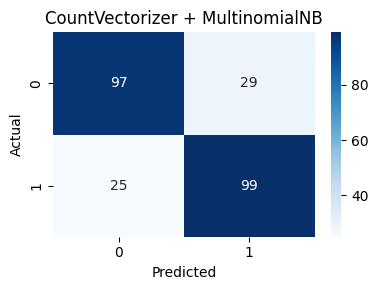

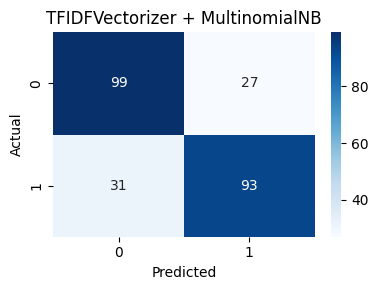

In [ ]:
import mlflow
import mlflow.sklearn
import logging
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

# --- Logging setup ---
for h in logging.root.handlers[:]:
    logging.root.removeHandler(h)
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[logging.StreamHandler(sys.stdout)],
    force=True
)

# Example: replace with your data
# df = pd.read_csv("your_dataset.csv")
# X, y = df['review'], df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# --- Define preprocessing methods ---
vectorizers = {
    "CountVectorizer": CountVectorizer(stop_words='english'),
    "TFIDFVectorizer": TfidfVectorizer(stop_words='english')
}

# --- Define model ---
model = MultinomialNB()

# --- Define full param grid (vectorizer + model) ---
param_grid = {
    'vectorizer__max_features': [500, 1000, 2000],
    'vectorizer__ngram_range': [(1,1), (1,2)],
    'clf__alpha': [0.01, 0.1, 0.3, 0.5, 1.0],
    'clf__fit_prior': [True, False]
}

# --- MLflow parent run ---
with mlflow.start_run(run_name='Text_Classification_All_Experiments') as parent_run:
    
    for vec_name, vec in vectorizers.items():
        logging.info(f"🔹 Using Vectorizer: {vec_name}")

        # Build pipeline
        pipeline = Pipeline([
            ('vectorizer', vec),
            ('clf', model)
        ])

        # Grid Search
        grid = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=3,
            n_jobs=-1,
            verbose=1,
            return_train_score=True
        )
        grid.fit(X_train, y_train)

        # --- Log each parameter combination ---
        for i, params in enumerate(grid.cv_results_["params"]):
            with mlflow.start_run(run_name=f"{vec_name}_MultinomialNB_grid_{i}", nested=True) as child_run:
                mlflow.log_param("vectorizer", vec_name)
                mlflow.log_params(params)
                mlflow.log_metric("mean_test_score", grid.cv_results_["mean_test_score"][i])
                mlflow.log_metric("mean_train_score", grid.cv_results_["mean_train_score"][i])

                # If best params, log detailed metrics + model
                if params == grid.best_params_:
                    logging.info(f"✅ Best params for {vec_name}: {params}")
                    mlflow.set_tag("best_model", "True")

                    best_model = grid.best_estimator_
                    y_pred = best_model.predict(X_test)

                    # Compute metrics
                    acc = accuracy_score(y_test, y_pred)
                    prec = precision_score(y_test, y_pred)
                    rec = recall_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred)

                    mlflow.log_metrics({
                        "accuracy": acc,
                        "precision": prec,
                        "recall": rec,
                        "f1": f1
                    })

                    # Log classification report
                    report = classification_report(y_test, y_pred, output_dict=True)
                    mlflow.log_dict(report, "classification_report.json")

                    # Log confusion matrix
                    conf = confusion_matrix(y_test, y_pred)
                    mlflow.log_dict({"confusion_matrix": conf.tolist()}, "confusion_matrix.json")

                    # Plot confusion matrix
                    plt.figure(figsize=(4,3))
                    sns.heatmap(conf, annot=True, fmt="d", cmap="Blues")
                    plt.xlabel("Predicted")
                    plt.ylabel("Actual")
                    plt.title(f"{vec_name} + MultinomialNB")
                    plt.tight_layout()
                    plt.savefig("confusion_matrix.png")
                    mlflow.log_artifact("confusion_matrix.png")

                    # Log model
                    input_example = (
                        X_test[:5].tolist()
                    )
                    mlflow.sklearn.log_model(best_model, "best_model", input_example=input_example)

                    logging.info(f"{vec_name} -> acc={acc:.3f}, f1={f1:.3f}")

logging.info("🎯 All vectorizers and hyperparameter combinations logged to MLflow successfully!")


In [20]:
grid.best_index_

np.int64(34)